In [1]:
import pandas as pd

import util.beam_data as bd
from util.data import find_last_created_dir
from util.data import meaningful

In [2]:
root = "../beam_root"
pd.set_option('display.max_rows', 1000)
beam_out_path = None
# beam_out_path = "sfbay/gemini-scenario-5-calibrate5p__2022-12-30_12-46-10_nyq"
beam_out = find_last_created_dir(f"{root}/output", level = 1, num = 0) if beam_out_path is None else f"{root}/output/{beam_out_path}"
print(f"Using beam out dir: {beam_out}")
it = 0
ev = bd.load_events(f"{beam_out}/ITERS/it.{it}/{it}.events.csv.gz")

def fun1(df):
    return df['type'] == 'PersonEntersVehicle'

display(str(ev.shape[0]) + " " + str(ev[(ev['type'] == 'PersonEntersVehicle') & ev['vehicle'].str.startswith('body-')].shape[0]))


Using beam out dir: ../beam_root/output/sf-light/rhtp-multi-rhm__2023-10-17_12-18-33_pkp
events file url: ../beam_root/output/sf-light/rhtp-multi-rhm__2023-10-17_12-18-33_pkp/ITERS/it.0/0.events.csv.gz
loading took 4.245180130004883 seconds


'516845 4975'

In [3]:
pte = meaningful(ev[(ev['type'] == 'PathTraversal')])
pev = meaningful(ev[(ev['type'] == 'PersonEntersVehicle')])
plv = meaningful(ev[(ev['type'] == 'PersonLeavesVehicle')])
lpe = meaningful(ev[(ev['type'] == 'LeavingParkingEvent')])
pe = meaningful(ev[(ev['type'] == 'ParkingEvent')])
mc = meaningful(ev[(ev['type'] == 'ModeChoice')])
actstart = meaningful(ev[(ev['type'] == 'actstart')])
actend = meaningful(ev[(ev['type'] == 'actend')])
repl = meaningful(ev[(ev['type'] == 'Replanning')])
rh_confirm = meaningful(ev[(ev['type'] == 'RideHailReservationConfirmation')])
reserv_rh = meaningful(ev[(ev['type'] == 'ReserveRideHail')])
person_cost = meaningful(ev[(ev['type'] == 'PersonCost')])
# ev['type'].unique()

In [20]:
# display(mc[mc['availableAlternatives'].str.contains("ride_hail_transit", case=False, na=False)])

mc[mc['mode'] == "ride_hail"]
# repl
# pte[(pte['numPassengers'] > 1 ) & pte['vehicle'].str.startswith('ride')]

,time,type,person,mode,currentTourMode,length,availableAlternatives,location,personalVehicleAvailable,tourIndex,legModes,legVehicleIds,currentActivity,nextActivity,hour


In [17]:
pte_pooled = pte[pte['vehicle'].str.startswith('ride') & (pte['numPassengers'] > 1)].copy()
# pte_pooled = pte[pte['vehicle'].str.startswith('ride') & (pte['vehicle'].str.contains('Uber', case=False)) & (pte['numPassengers'] > 0)].copy()
pte_pooled

,driver,vehicle,time,type,vehicleType,primaryFuelLevel,secondaryFuelLevel,startX,startY,endX,...,linkTravelTime,secondaryFuel,secondaryFuelType,primaryFuelType,riders,toStopIndex,fromStopIndex,seatingCapacity,tollPaid,hour
54853,rideHailAgent-020600-2012000496406-0-3481502,rideHailVehicle-020600-2012000496406-0-3481502...,26138,PathTraversal,RH_Car,3.635595e+09,0.0,-122.426975,37.757352,-122.396709,...,"0.349,0.47,8.598,1.17,17.202,7.923,15.984,0.67...",0.0,None,Gasoline,012202-2013000609715-0-5899892:016000-20150002...,NaN,NaN,4,0.0,7
56427,rideHailAgent-015400-2014000237061-0-2722915,rideHailVehicle-015400-2014000237061-0-2722915...,26310,PathTraversal,RH_Car,3.599062e+09,0.0,-122.427065,37.747706,-122.432931,...,"7.861,6.733,1.324,0.869,7.107,7.894,6.824,1.25...",0.0,None,Gasoline,026200-2014000664715-0-1076672:026200-20140006...,NaN,NaN,4,0.0,7
69279,rideHailAgent-accessible-025900-2013001288243-...,rideHailVehicle-025900-2013001288243-0-4001503...,27735,PathTraversal,RH_Car-wheelchair,3.618237e+09,0.0,-122.426668,37.743574,-122.445144,...,"1.304,0.155,17.218,17.483,17.509,10.267,7.422,...",0.0,None,Gasoline,026402-2016000324417-1-8077882:023003-20160004...,NaN,NaN,4,0.0,7
90336,rideHailAgent-030400-2015001060705-0-443232,rideHailVehicle-030400-2015001060705-0-443232@...,29931,PathTraversal,RH_Car,3.600327e+09,0.0,-122.459225,37.723652,-122.494930,...,"7.983,6.44,0.161,0.164,0.592,6.841,6.428,17.53...",0.0,None,Gasoline,021500-2016000645938-0-5009654:021500-20140011...,NaN,NaN,4,0.0,8
112236,rideHailAgent-accessible-012000-2012000374827-...,rideHailVehicle-012000-2012000374827-0-683895@...,32087,PathTraversal,RH_Car-wheelchair,3.571938e+09,0.0,-122.504382,37.738149,-122.473717,...,"16.627,0.948,0.916,17.061,0.464,0.155,0.329,0....",0.0,None,Gasoline,033204-2013001005226-0-2603183:033204-20130010...,NaN,NaN,4,0.0,8
121749,rideHailAgent-016700-2013000625848-0-3101998,rideHailVehicle-016700-2013000625848-0-3101998...,33089,PathTraversal,RH_Car,3.605785e+09,0.0,-122.426871,37.757358,-122.453906,...,"0.47,0.349,7.845,7.927,17.976,12.677,4.347,17....",0.0,None,Gasoline,035300-2014001428766-2-7443707:061100-20130000...,NaN,NaN,4,0.0,9
127234,rideHailAgent-030400-2015000382639-0-6296764,rideHailVehicle-030400-2015000382639-0-6296764...,33736,PathTraversal,RH_Car,3.592606e+09,0.0,-122.418463,37.752243,-122.412807,...,"0.321,1.145,5.184,5.545,1.103,1.504,5.147,4.71...",0.0,None,Gasoline,026200-2014000069002-1-1204607:012700-20120005...,NaN,NaN,4,0.0,9
154173,rideHailAgent-accessible-033204-2012000025664-...,rideHailVehicle-033204-2012000025664-0-7059337...,36982,PathTraversal,RH_Car-wheelchair,3.582433e+09,0.0,-122.426975,37.757352,-122.398453,...,"0.349,0.47,8.598,1.17,8.025,7.929,7.943,15.991...",0.0,None,Gasoline,032601-2012001201746-0-7570313:023001-20120002...,NaN,NaN,4,0.0,10
193269,rideHailAgent-012501-2016000706115-0-5135691,rideHailVehicle-012501-2016000706115-0-5135691...,42177,PathTraversal,RH_Car,3.640616e+09,0.0,-122.412576,37.780527,-122.392956,...,"8.314,2.024,0.336,0.456,1.392,1.319,2.434,7.11...",0.0,None,Gasoline,023400-2016000792533-0-1584515:023400-20150012...,NaN,NaN,4,0.0,11
223904,rideHailAgent-accessible-025300-2013001223329-...,rideHailVehicle-025300-2013001223329-0-5390894...,46366,PathTraversal,RH_Car-wheelchair,3.624946e+09,0.0,-122.434317,37.733034,-122.403666,...,"2.105,2.066,1.531,1.77,2.545,0.467,0.967,9.871...",0.0,None,Gasoline,030201-2016000875533-0-4766733:030201-20160008...,NaN,NaN,4,0.0,12


In [ ]:
ride_hail_mc = mc[mc['mode'].str.startswith("ride_hail")]
# display(ride_hail_mc) #& (mc['length'] > 0)
denied = repl[repl['reason'].str.contains('RIDE_HAIL')]
ride_hail_mc[~ride_hail_mc['person'].isin(denied['person'])]
# display(ride_hail_mc[ride_hail_mc['legVehicleIds'].str.contains('@Uber')]['mode'].value_counts())
# display(ride_hail_mc[ride_hail_mc['legVehicleIds'].str.contains('@file1')]['mode'].value_counts())
# ride_hail_mc[ride_hail_mc['person'].isin(negative_persons)]

In [64]:
# Average waiting time of RH vehicles
# display(f"chooses = {len(mc[mc['mode'].str.startswith('ride_hail')])}")
# ev = pd.read_csv("../output/sf-light/rh-stops-reserve-long-walk__2023-05-30_17-11-22_imo/ITERS/it.0/0.events.csv.gz")
rh_result = ev[((ev['type'] == 'PathTraversal') & (ev['mode'] == 'walk') & (ev['length'] == 0))
               | ((ev['type'] == 'PersonEntersVehicle') & ev['vehicle'].str.startswith("rideHailVehicle-") & ~ev['person'].str.startswith('rideHailAgent-', na=False))
               # | ((ev['type'] == 'Replanning') & (repl['reason'].str.contains('RIDE_HAIL')))
]
# rh_result = meaningful(rh_result)
rh_result['person'].loc[rh_result['type'] == 'PathTraversal'] = rh_result['driver']
rh_result = rh_result.drop(columns=['startX', 'startY', 'endX', 'endY'])
# display(rh_result)
rh_result['walking_end'] = rh_result.groupby('person')['time'].shift(1)

display(f"rh_result / 2 = {len(rh_result) / 2}")

success = rh_result[rh_result['type'] == 'PersonEntersVehicle'].copy()
display(f"success = {len(success)}")
success['waiting_time'] = success['time'] - success['walking_end']
success[["person", "waiting_time"]].sort_values('waiting_time', ascending=True)
success['waiting_time'].describe()
# negative_persons = success[success['waiting_time'] < 0][['person', 'waiting_time']]
# negative_persons

/tmp/ipykernel_168670/3829271721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rh_result['person'].loc[rh_result['type'] == 'PathTraversal'] = rh_result['driver']


'rh_result / 2 = 3452.0'

'success = 317'

count    317.000000
mean     335.460568
std      114.537633
min       93.000000
25%      254.000000
50%      339.000000
75%      402.000000
max      665.000000
Name: waiting_time, dtype: float64

In [7]:
# Average waiting time of RH vehicles (corrected)
display(f"chooses = {len(mc[mc['mode'].str.startswith('ride_hail')])}")
rh_result = ev[((ev['type'] == 'PathTraversal') & (ev['mode'] == 'walk'))
               | ((ev['type'] == 'PersonEntersVehicle') & ev['vehicle'].str.startswith("body-"))
               | ((ev['type'] == 'PathTraversal') & ev['vehicle'].str.startswith("rideHailVehicle-"))
    # | ((ev['type'] == 'Replanning') & (repl['reason'].str.contains('RIDE_HAIL')))
               ]
rh_result = meaningful(rh_result)
rh_result['person'].loc[(ev['type'] == 'PathTraversal') & (ev['mode'] == 'walk')] = rh_result['driver']
rh_result = rh_result.drop(columns=['startX', 'startY', 'endX', 'endY'])
display(rh_result[rh_result['riders'].str.contains('032601-2012001243911-0-7187444', na=False) | (rh_result['person'] == '032601-2012001243911-0-7187444')])
# display(rh_result)
rh_result['walking_end'] = rh_result.groupby('person')['time'].shift(1)

display(f"rh_result / 2 = {len(rh_result) / 2}")

success = rh_result[rh_result['type'] == 'PersonEntersVehicle'].copy()
display(f"success = {len(success)}")
success['waiting_time'] = success['time'] - success['walking_end']
success[["person", "waiting_time"]].sort_values('waiting_time', ascending=True)
success['waiting_time'].describe()
# negative_persons = success[success['waiting_time'] < 0]['person']

'chooses = 837'

,driver,vehicle,time,type,vehicleType,person,mode,currentTourMode,links,numPassengers,...,tollPaid,primaryFuelLevel,capacity,arrivalTime,departureTime,linkTravelTime,secondaryFuel,secondaryFuelType,primaryFuelType,hour
292650,NaN,body-032601-2012001243911-0-7187444,56040,PersonEntersVehicle,NaN,032601-2012001243911-0-7187444,NaN,NaN,NaN,<NA>,...,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,15
292655,032601-2012001243911-0-7187444,body-032601-2012001243911-0-7187444,56040,PathTraversal,BODY-TYPE-DEFAULT,032601-2012001243911-0-7187444,walk,ride_hail,NaN,1,...,0.0,2210000.000,0,56040,56040,NaN,0.0,None,Food,15
307188,032601-2012001243911-0-7187444,body-032601-2012001243911-0-7187444,57778,PathTraversal,BODY-TYPE-DEFAULT,032601-2012001243911-0-7187444,walk,walk,"37254,60762,60764,35549,60736,78963,78961,7896...",1,...,0.0,2101285.499,0,57778,56200,"133.021,8.661,68.329,8.16,78.585,26.485,168.74...",0.0,None,Food,16
350482,NaN,body-032601-2012001243911-0-7187444,62700,PersonEntersVehicle,NaN,032601-2012001243911-0-7187444,NaN,NaN,NaN,<NA>,...,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,17
363049,032601-2012001243911-0-7187444,body-032601-2012001243911-0-7187444,64140,PathTraversal,BODY-TYPE-DEFAULT,032601-2012001243911-0-7187444,walk,walk,"79117,89975,31471,31515,79123,31501,34125,2599...",1,...,0.0,2002077.873,0,64140,62700,"122.665,31.119,6.273,159.612,129.378,30.478,5....",0.0,None,Food,17


'rh_result / 2 = 7467.0'

'success = 4975'

count     2987.000000
mean     16431.142618
std      14706.668082
min         30.000000
25%       2775.500000
50%      10221.000000
75%      28581.000000
max      56914.000000
Name: waiting_time, dtype: float64

In [5]:
#Which RH fleet is used most

# Jessica's function
def get_ridehail_stats(events):
    mc = events.loc[(events.type=='ModeChoice')&(events['mode'].isin(['ride_hail','ride_hail_pooled','ride_hail_transit']))][['time','mode','person']]
    e_v = events.loc[(events.type=='PersonEntersVehicle')&(events.vehicle.str.contains('rideHail'))][['time','vehicle','person']]
    # merge PersonEntersVehicle with ModeChoices
    mc_veh = mc.merge(e_v,how='left',left_on='person',right_on='person',suffixes=('_mc','_veh'))
    mc_veh['time_delta']=mc_veh['time_veh']-mc_veh['time_mc']
    mc_veh = mc_veh.loc[mc_veh.time_delta>=0]
    mc_veh = mc_veh.sort_values(['person','time_mc','time_delta']).groupby(['person','time_mc']).first().reset_index()
    # identify fleet ID
    mc_veh[['vehicleId','fleetId']] = mc_veh['vehicle'].str.split('@',expand=True).rename(columns={0:'vehicleId',1:'fleetId'})

    display(mc_veh.groupby(['fleetId','mode']).count()['person'])

    if sum(events.type.str.contains('PersonCost'))>1:
        costs = events.loc[(events.type=='PersonCost')&(events['mode'].str.contains('ride'))][['person','mode','time','netCost']]
        # merge PersonCost with ModeChoices
        mc_cost = mc_veh.merge(costs,how='left',left_on=['person','mode'],right_on=['person','mode'],suffixes=('_mc','_cost'))
        mc_cost['time_delta_cost'] = mc_cost['time']-mc_cost['time_mc']
        mc_cost=mc_cost.loc[mc_cost.time_delta_cost>=0]
        mc_cost = mc_cost.sort_values(['person','time_mc','time_delta_cost']).groupby(['person','time_mc']).first().reset_index()

        display(mc_cost.groupby(['fleetId','mode']).mean())

display(mc['mode'].value_counts(normalize=True))
rh_pte = pte[pte['vehicle'].str.startswith('rideHail') & (pte['numPassengers'] > 0)]
uber = rh_pte[rh_pte['vehicle'].str.contains('Uber')].shape[0]
cruise = rh_pte[rh_pte['vehicle'].str.contains('Cruise')].shape[0]
lyft = rh_pte[rh_pte['vehicle'].str.contains('Lyft')].shape[0]
print(f"uber = {uber}, cruise = {cruise}, lyft = {lyft}")
rh_pte.sort_values(['vehicle', 'time'])
rh_pte[rh_pte['vehicle'].str.contains('Cruise')]
# rh_confirm[rh_confirm['vehicle'].str.contains('Cruise', na=False) & (rh_confirm['reservationType'] == 'Solo')]
# rh_pte[rh_pte['vehicle'].isin(['rideHailVehicle-5715445@Cruise', 'rideHailVehicle-5686308@Cruise'])]
get_ridehail_stats(ev)
# rh_confirm[rh_confirm['cost'] > 10.0]
# person_cost

# rh_confirm

car                 0.867294
ride_hail           0.056845
ride_hail_pooled    0.053443
walk                0.021217
walk_transit        0.001201
Name: mode, dtype: float64

uber = 0, cruise = 0, lyft = 0


fleetId    mode            
GlobalRHM  ride_hail           277
           ride_hail_pooled    253
Name: person, dtype: int64

In [15]:
# a particular person events
person_id = '016000-2015000256008-0-6543940'

meaningful(ev[(ev['person'] == person_id) | (ev['vehicle'] == f'body-{person_id}') | (ev['driver'] == person_id)
              | ev['riders'].str.contains(f'{person_id}:') | ev['riders'].str.contains(f':{person_id}') | (ev['riders'] == person_id)])# \
# [["time", "type", "mode", "vehicle", "vehicleType", "driver", "actType", "availableAlternatives", "personalVehicleAvailable", "link", "location"
#      , "links"
#      , "parkingTaz", "parkingType", "locationY", "locationX", "score", "cost"
#      , "person"]] \
    # meaningful(events[(events['person'] == '061100-2016001385848-0-6031565')])

,driver,vehicle,time,type,person,link,actType,secondaryFuelLevel,primaryFuelLevel,departTime,...,arrivalTime,departureTime,linkTravelTime,secondaryFuel,secondaryFuelType,primaryFuelType,links,numPassengers,primaryFuel,hour
36962,NaN,NaN,23820,ModeChoice,016000-2015000256008-0-6543940,NaN,NaN,NaN,NaN,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,6
36963,NaN,NaN,23820,actend,016000-2015000256008-0-6543940,31340,Home,NaN,NaN,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,6
36964,NaN,NaN,23820,ReserveRideHail,016000-2015000256008-0-6543940,NaN,NaN,NaN,NaN,23820,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,6
38072,NaN,body-016000-2015000256008-0-6543940,24000,PersonEntersVehicle,016000-2015000256008-0-6543940,NaN,NaN,NaN,NaN,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,6
38073,016000-2015000256008-0-6543940,body-016000-2015000256008-0-6543940,24000,PathTraversal,NaN,NaN,NaN,0.0,2.210000e+06,<NA>,...,24000,24000,NaN,0.0,None,Food,NaN,1,0.0,6
38076,NaN,rideHailVehicle-012000-2012000374827-0-683895@...,24011,PersonEntersVehicle,016000-2015000256008-0-6543940,NaN,NaN,NaN,NaN,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,6
39714,NaN,rideHailVehicle-012000-2012000374827-0-683895@...,24280,PersonLeavesVehicle,016000-2015000256008-0-6543940,NaN,NaN,NaN,NaN,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,6
39854,rideHailAgent-accessible-012000-2012000374827-...,rideHailVehicle-012000-2012000374827-0-683895@...,24280,PathTraversal,NaN,NaN,NaN,0.0,3.633272e+09,<NA>,...,24280,24011,"11.132,4.682,5.458,5.45,4.284,4.259,3.909,0.35...",0.0,None,Gasoline,"12688,54163,38344,38346,50170,50172,48052,8730...",2,2.2198602378780007E7,6
46079,NaN,SF:7676845,25183,PersonEntersVehicle,016000-2015000256008-0-6543940,NaN,NaN,NaN,NaN,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,6
46760,TransitDriverAgent-SF:7676845,SF:7676845,25285,PathTraversal,NaN,NaN,NaN,0.0,3.600000e+09,<NA>,...,25285,25183,NaN,0.0,None,Electricity,NaN,2,0.0,7


In [8]:
# pev[pev['vehicle'].str.startswith('rideHail')]
display(pte[pte['vehicle'].str.startswith('rideHail') & (pte['mode'] == 'car')].shape)
display(pte[(pte['vehicleType'].str.contains('freight'))  & (pte['mode'] == 'car')].shape)
display(pte[(pte['mode'] == 'car')].shape)
display(pte[(pte['vehicle'] == '')].shape)

(23, 30)

(0, 30)

(135, 30)

In [ ]:
# pte[pte['primaryFuelType'].str.startswith('Electricity')]['vehicle'].unique()
# pte[pte['vehicle'] == "rideHailVehicle-061500-2014000189243-0-4752174@GlobalRHM"]
display(pte[pte['vehicle'].str.startswith('rideHail') & (pte['numPassengers'])])
# pte[pte['vehicle'].str.contains('rideHailVehicle-016400-2015001364898-0-434884')]


In [71]:
# long walking trips
# mc[(mc['availableAlternatives'] == 'WALK') & (mc['length'] > 4800)]
# pte[(pte['currentTourMode'] == 'walk') & (pte['length'] > 5000)]
# ev[ev['reason'] == 'ResourceUnavailable RIDE_HAIL_POOLED']
meaningful(ev[ev['person'] == '4'])


6

0

0

In [5]:
choice = meaningful(ev[ev['type'].isin(['ModeChoice', 'Replanning'])]).drop(labels = ['type', 'location', 'hour'], axis = 1)
choice = choice.sort_values(['person', 'time'])
# choice_repl[choice_repl['person'] == '010200-2014001327621-0-7815204']
# meaningful(ev[ev['person'] == '010200-2014001327621-0-7815204'])
choice#.drop(['personalVehicleAvailable', 'legModes', 'legVehicleIds'], axis = 1)
# walking_persons = choice[choice['mode'] == 'walk']['person']
# choice[choice['person'].isin(walking_persons)].drop(['personalVehicleAvailable', 'legModes', 'legVehicleIds'], axis = 1).head(60)


,time,person,reason,length,currentTourMode,mode,availableAlternatives,personalVehicleAvailable,tourIndex,legModes,legVehicleIds,currentActivity,nextActivity
94823,18478,1017643,NaN,818.381000,car,car,CAR,true,1,"WALK,CAR,CAR,WALK","body-1017643,1216,1216,body-1017643",Home,work
702560,44780,1017643,NaN,4112.515489,car,walk,WALK,true,1,WALK,body-1017643,work,atwork
797862,48736,1017643,NaN,5530.691186,car,walk,WALK,false,1,WALK,body-1017643,atwork,escort
895228,52744,1017643,NaN,9447.169000,car,walk,WALK,false,1,WALK,body-1017643,escort,shopping
1098323,60011,1017643,NaN,845.406000,car,walk,WALK,false,1,WALK,body-1017643,shopping,Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442599,73393,994623,NaN,5497.363000,walk,bike,BIKE:WALK:BIKE_TRANSIT:WALK_TRANSIT:BIKE_TRANS...,true,1,"WALK,BIKE,BIKE,WALK","body-994623,bay_wheels-7,bay_wheels-7,body-994623",work,Home
262789,27763,997202,NaN,2284.338000,car,car,CAR:WALK:WALK_TRANSIT,true,1,"WALK,CAR,CAR,WALK","body-997202,2929,2929,body-997202",Home,work
1066498,58924,997202,NaN,16749.289624,car,walk,WALK,true,1,WALK,body-997202,work,atwork
1398343,71061,997202,NaN,4891.623607,car,walk,WALK,false,1,WALK,body-997202,atwork,Work


In [7]:
# person_activity = mc.groupby(['person', 'nextActivity'])['type'].count().reset_index()
# person_multi_work = person_activity[(person_activity['nextActivity'] == "Work") & (person_activity['type'] >= 2)]['person']
# person_other_activities = person_activity[(~person_activity['nextActivity'].isin(["Work", "Home"])) & person_activity['person'].isin(person_multi_work)]
# person_other_activities
persons3 = choice[(~choice['currentActivity'].str.startswith("Home", na=True)) & ~choice['nextActivity'].str.startswith("Home", na=True)]['person']
# choice[choice['person'].isin(persons3)].drop(['personalVehicleAvailable', 'legModes', 'legVehicleIds'], axis = 1)
choice[choice['person'].isin(persons3)]

,time,person,reason,length,currentTourMode,mode,availableAlternatives,personalVehicleAvailable,tourIndex,legModes,legVehicleIds,currentActivity,nextActivity
94823,18478,1017643,NaN,818.381000,car,car,CAR,true,1,"WALK,CAR,CAR,WALK","body-1017643,1216,1216,body-1017643",Home,work
702560,44780,1017643,NaN,4112.515489,car,walk,WALK,true,1,WALK,body-1017643,work,atwork
797862,48736,1017643,NaN,5530.691186,car,walk,WALK,false,1,WALK,body-1017643,atwork,escort
895228,52744,1017643,NaN,9447.169000,car,walk,WALK,false,1,WALK,body-1017643,escort,shopping
1098323,60011,1017643,NaN,845.406000,car,walk,WALK,false,1,WALK,body-1017643,shopping,Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442599,73393,994623,NaN,5497.363000,walk,bike,BIKE:WALK:BIKE_TRANSIT:WALK_TRANSIT:BIKE_TRANS...,true,1,"WALK,BIKE,BIKE,WALK","body-994623,bay_wheels-7,bay_wheels-7,body-994623",work,Home
262789,27763,997202,NaN,2284.338000,car,car,CAR:WALK:WALK_TRANSIT,true,1,"WALK,CAR,CAR,WALK","body-997202,2929,2929,body-997202",Home,work
1066498,58924,997202,NaN,16749.289624,car,walk,WALK,true,1,WALK,body-997202,work,atwork
1398343,71061,997202,NaN,4891.623607,car,walk,WALK,false,1,WALK,body-997202,atwork,Work


In [8]:
walking_persons = mc[(mc['mode'] == 'walk') & (mc['length'] > 5000) & (mc['personalVehicleAvailable'] == "true")]['person']
choice[choice['person'].isin(walking_persons)].sort_values(['person', 'time'])
# mc[(mc['mode'] == 'walk') & (mc['length'] > 5000) & (mc['personalVehicleAvailable'] == 'true')]

,time,person,reason,length,currentTourMode,mode,availableAlternatives,personalVehicleAvailable,tourIndex,legModes,legVehicleIds,currentActivity,nextActivity
141133,22968,1068147,NaN,92981.373181,walk,walk,WALK,true,1,WALK,body-1068147,Home,work
1595626,90346,1068147,NaN,92981.373181,walk,walk,WALK,false,1,WALK,body-1068147,work,Home
269646,27964,1068148,NaN,19546.480215,walk,walk,WALK,true,1,WALK,body-1068148,Home,work
1557126,83304,1068148,NaN,19546.480215,walk,walk,WALK,false,1,WALK,body-1068148,work,Home
338103,30279,1073225,NaN,5593.977586,walk,walk,WALK,true,1,WALK,body-1073225,Home,escort
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329162,68022,976097,NaN,30450.756000,car,car,CAR,true,3,"WALK,CAR,CAR,WALK","body-976097,1698,1698,body-976097",social,Home
262789,27763,997202,NaN,2284.338000,car,car,CAR:WALK:WALK_TRANSIT,true,1,"WALK,CAR,CAR,WALK","body-997202,2929,2929,body-997202",Home,work
1066498,58924,997202,NaN,16749.289624,car,walk,WALK,true,1,WALK,body-997202,work,atwork
1398343,71061,997202,NaN,4891.623607,car,walk,WALK,false,1,WALK,body-997202,atwork,Work


In [ ]:
electric_vehicles = ['4']

electric_ev = meaningful(ev[ev['vehicle'].isin(electric_vehicles)])
electric_ev['startingFuelLevel'] = pd.to_numeric(electric_ev['primaryFuelLevel']) + pd.to_numeric(electric_ev['primaryFuel'])
electric_ev[['type', "vehicle", 'startingFuelLevel', 'primaryFuelLevel', 'primaryFuel']]
# electric_ev

In [ ]:
# some person events
important_columns = ["time", "type", "currentTourMode", "mode", "vehicle", "vehicleType", "driver", "actType", "availableAlternatives",
                     # "personalVehicleAvailable", "link", "location", "links",
                     "startX", "startY", "endX", "endY",
                     "person"]

person_id = '030202-2016000025297-0-5404271'
# person_id = '5'
vehicle_ids = ev[(ev['person'] == person_id) | ev['driver'] == person_id]['vehicle'].unique()

ev[(ev['person'] == person_id)
   # | (ev['vehicle'].str.contains(person_id))
   | (ev['driver'] == person_id)
   | (ev['vehicle'].isin(vehicle_ids))
][important_columns ]
# ]['vehicle'].unique()
# ]

In [18]:
# ev[ev['type'] == 'FleetStoredElectricityEvent']
# ev[ev['vehicle'].str.startswith('ride', na=False) & (~ev['primaryFuelLevel'].isnull())]
# ev[(ev['type'] == 'PersonEntersVehicle') & ~ev['person'].str.startswith('ride', na=False)]
# ev[~ev['mode'].isnull()]['type'].unique()
meaningful(ev[(ev['currentTourMode'] == 'last_resort_teleport')])

array(['ModeChoice', 'PathTraversal'], dtype=object)

In [ ]:
#most parked TAZes
num = pe.groupby('parkingTaz')['type'].count().rename('num_parking')
num.sort_values(ascending=False)
# num.loc['101111']

In [ ]:
freight_ev = ev[(ev['vehicle'].str.startswith("freight", na=False)) | (ev['person'].str.startswith("freight", na=False))][['person', 'actType', 'time', 'type', 'vehicle', 'mode',
      'locationY', 'locationX', 'secondaryFuelLevel', 'startX',
      'startY', 'endX', 'endY', 'vehicleType',
      'arrivalTime', 'departureTime'
      ]]
# freight_ev
# freight_pte = freight_ev[freight_ev['type'] == 'PathTraversal']
# freight_pte
# freight_pte[freight_pte['mode'] != "car"]
# tour_id = "vehicle-3"
# tour_ev = freight_ev[freight_ev['person'].str.contains(tour_id, na=False) | freight_ev['vehicle'].str.contains(tour_id, na=False)]
# tour_ev[tour_ev['type'].isin(['actstart', 'actend', 'PathTraversal'])]
freight_ev[freight_ev['type'].isin(['actstart', 'actend', 'PathTraversal'])]

In [4]:
# event types
ev['type'].unique()

array(['PersonEntersVehicle', 'PathTraversal', 'ModeChoice', 'actend',
       'ReserveRideHail', 'LeavingParkingEvent', 'ParkingEvent',
       'PersonLeavesVehicle', 'actstart', 'ChargingPlugInEvent',
       'RefuelSessionEvent', 'ChargingPlugOutEvent', 'Replanning'],
      dtype=object)

In [ ]:
bikes = pte[(pte['mode'] == 'bike')][['vehicle', 'driver', 'time', 'length', 'departureTime', 'arrivalTime',
                                      'linkTravelTime', 'startX', 'startY', 'endY', 'endX', 'vehicleType', 'links']].copy()
# bikes[bikes['vehicle'].str.startswith('bay')]


In [ ]:
walks = pte[(pte['mode'] == 'walk')][['vehicle', 'driver', 'time', 'length', 'departureTime', 'arrivalTime',
                                      'linkTravelTime', 'startX', 'startY', 'endY', 'endX', 'vehicleType', 'links']].copy()
# bikes[bikes['vehicle'].str.startswith('bay')]
walks['travel_time'] = walks["arrivalTime"] - walks["departureTime"]
walks["travel_time"].sum()

In [ ]:
bikes = pte[(pte['mode'] == 'bike')][['vehicle', 'time', 'vehicleType']].copy()
bikes['hour'] = bikes['time'] // 3600
bikes['shared'] = bikes['vehicle'].str.startswith('bay_wheels')
g = bikes.groupby('hour')['shared'].mean()
display(g)
bikes[(bikes['hour'] == 3) & bikes['shared']]
# bikes.groupby('hour').count()['']


In [4]:
# pev[(pev['person'].str.match("^\d+-\d+-\d+-\d+$")) & (pev['vehicle'].str.startswith('ride'))]


public_transport = pev[pev['vehicle'].str.contains(':')]
# shared = pev[(pev['vehicle'].str.contains('fleet')) & (pev['time'] < 36000)].groupby('person')['type'].count().reset_index()
# shared = shared[shared['type'] > 2]
shared = pev[(pev['vehicle'].str.contains('fleet'))]
pd.merge(public_transport, shared, on='person')


,vehicle_x,time_x,type_x,person,hour_x,vehicle_y,time_y,type_y,hour_y


In [10]:
personEnters = pev[(pev['vehicle'].str.contains('ride')) & (~pev['person'].str.startswith("rideHailAgent"))]
print(len(personEnters[personEnters['vehicle'].str.endswith('@Uber')]))
print(len(personEnters[personEnters['vehicle'].str.endswith('@file1')]))
personEnters

4599
229


,vehicle,time,type,person,hour
17957,rideHailVehicle-016700-2013001237688-0-7813295...,18266,PersonEntersVehicle,016900-2015001293998-0-7176369,5
17958,rideHailVehicle-021800-2013000077130-0-7568754...,18238,PersonEntersVehicle,021800-2013000180849-0-2347815,5
18031,rideHailVehicle-010200-2013001407490-0-7050876...,18288,PersonEntersVehicle,012901-2016001446789-0-5393596,5
18033,rideHailVehicle-061500-2012000225982-3-1445659...,18292,PersonEntersVehicle,061500-2012001149313-0-1191940,5
18042,rideHailVehicle-015400-2015000437915-3-1833637...,18311,PersonEntersVehicle,045200-2015001053769-0-3868513,5
...,...,...,...,...,...
489302,rideHailVehicle-025701-2012000830049-0-2474280...,85816,PersonEntersVehicle,018000-2014001272495-1-6666024,23
489309,rideHailVehicle-010400-2016000821780-0-1313031...,85809,PersonEntersVehicle,061100-2016000747949-0-1577020,23
490001,rideHailVehicle-025701-2012000830049-0-2474276...,86022,PersonEntersVehicle,010200-2014001327621-0-7815204,23
490329,rideHailVehicle-030202-2013001137202-0-4004833...,86151,PersonEntersVehicle,026003-2014001230128-0-4509209,23


In [ ]:
lppe = pd.concat([lpe, pe])
lppe = lppe[lppe['vehicle'].str.startswith('my-shared-fleet-')].sort_values('time')
lppe['prev_event'] = lppe.groupby('vehicle')['type'].shift(1)
lppe['prev_driver'] = lppe.groupby('vehicle')['driver'].shift(1)

only_parking = lppe[lppe['type'] == 'ParkingEvent']
only_parking[only_parking['driver'] != only_parking['prev_driver']]
only_parking[only_parking['prev_event'] != 'LeavingParkingEvent']
lppe[lppe['vehicle'] == 'my-shared-fleet-34'].iloc[0:60]

In [ ]:
# lpe[(lpe['score'] < 0) & (lpe['vehicle'].str.startswith('my-'))]
drivers = set(["012602-2012001015491-0-7432236", "031400-2014000788156-0-569459", "033203-2016000471058-0-2222182", "012602-2012001015491-0-7432234", "026303-2016000613976-0-7696442", "012700-2012000543919-0-6285238", "033204-2013001005226-0-2603182", "030800-2015001150102-0-3366114", "026303-2016000613976-0-7696442", "025403-2014001324460-0-5136856", "026200-2014000664715-0-1076675", "600800-2014001325153-3-578677", "026004-2013001095891-0-5527523", "023003-2012000097895-0-7695136", "023003-2013000382737-0-1583441"])
vehicles = set(['my-fixed-non-reserving-fleet-49', 'my-fixed-non-reserving-fleet-11', 'my-fixed-non-reserving-fleet-283', 'my-fixed-non-reserving-fleet-135', 'my-fixed-non-reserving-fleet-157', 'my-fixed-non-reserving-fleet-36', 'my-fixed-non-reserving-fleet-344', 'my-fixed-non-reserving-fleet-109', 'my-fixed-non-reserving-fleet-198', 'my-fixed-non-reserving-fleet-79', 'my-fixed-non-reserving-fleet-371', 'my-fixed-non-reserving-fleet-135', 'my-fixed-non-reserving-fleet-123', 'my-fixed-non-reserving-fleet-168', 'my-fixed-non-reserving-fleet-111'])
pe[(pe['vehicle'].isin(vehicles)) & (pe['driver'].isin(drivers))]
pe[(pe['locationY'] > 37.75) & (pe['cost'] == 0)]


In [ ]:
lpe[(lpe['vehicle'] == 'my-fixed-non-reserving-fleet-135') & (lpe['driver'] == '012602-2012001015491-0-7432234')]


In [ ]:
# bike after transit
# person_id = '5839078'
# display(pev[pev['person'] == person_id])
df = pev.copy()
df['next_vehicle'] = df.groupby('person')['vehicle'].shift(-1)
df[(df['vehicle'].str.contains(":")) & (df['next_vehicle'].str.contains('fleet'))]

In [ ]:
df = ev.copy()
df = df[~df['person'].str.startswith('ride', na=True)]
df = df[~df['person'].str.startswith('TransitDriverAgent', na=True)]
df['next_event_type'] = df.groupby('person')['type'].shift(-1)
df[(df['type'] != 'actstart') & (df['next_event_type'].isnull())]

In [ ]:
df = meaningful(ev[(ev['type'].isin(['PersonEntersVehicle', 'PersonLeavesVehicle', 'PathTraversal']))]).copy()
df['person'].fillna(df['driver'], inplace=True)
df['prev_event_type'] =  df.groupby('person')['type'].shift(1)
df['prev_vehicle'] =  df.groupby('person')['vehicle'].shift(1)
# df[df['person'] == '033000-2014000265406-3-6294822']
df[(df['vehicle'].str.contains(':')) & (df['type'] == 'PersonEntersVehicle') & (df['prev_event_type'] == 'PathTraversal') & (df['prev_vehicle'].str.contains('body', na=False))]

In [127]:
#columns of events
columns = pd.DataFrame()
columns['value'] = ev.columns
columns[columns['value'].str.contains('mode', case=False)]

,value
7,mode
32,currentTourMode
35,pricingModel
44,legModes


In [17]:
data_filtered = ev.loc[ev.type.isin(
    # ["RefuelSessionEvent", "ChargingPlugInEvent", "ChargingPlugOutEvent", "actstart"]
    ["RefuelSessionEvent"]
)]
# display(meaningful(data_filtered))
charging_events = data_filtered[
    ["vehicle", "time", "type", "parkingTaz", "chargingPointType", "parkingType",
     "locationY", "locationX", "duration", "vehicleType", "person", "fuel",
     "parkingZoneId", "pricingModel", "actType"]
]
def process_data(ev):
    # ev["fuel"] = pd.to_numeric(ev["fuel"])
    rse = meaningful(ev[(ev['type'] == "actstart")])
    rse['ahour'] = rse['hour'] % 24
    # grouped = rse.groupby('ahour')['fuel'].agg('count')
    # df = grouped.to_frame().reset_index()
    # display(df)
    # return df.plot.bar(x='ahour', y='fuel')
    return rse[rse['actType'] == 'Home']

# charging_events[charging_events['time'] > 72000]

display(process_data(ev))

,person,time,type,link,actType,hour,ahour
106966,7031104,19907,actstart,55752,Home,5,5
109106,6539323,20198,actstart,168486,Home,5,5
109107,1462270,20159,actstart,146938,Home,5,5
115379,6471096,20833,actstart,38866,Home,5,5
117267,6950315,20952,actstart,105942,Home,5,5
...,...,...,...,...,...,...,...
1707859,1615597,160516,actstart,56836,Home,44,20
1707879,2144028,166758,actstart,155689,Home,46,22
1707891,1147530,174352,actstart,99043,Home,48,0
1707895,3835282,181211,actstart,144674,Home,50,2


,ahour,fuel
0,0,12
1,1,7
2,2,4
3,3,6
4,4,1
5,5,10
6,6,11
7,7,55
8,8,70
9,9,71


<AxesSubplot: xlabel='ahour'>

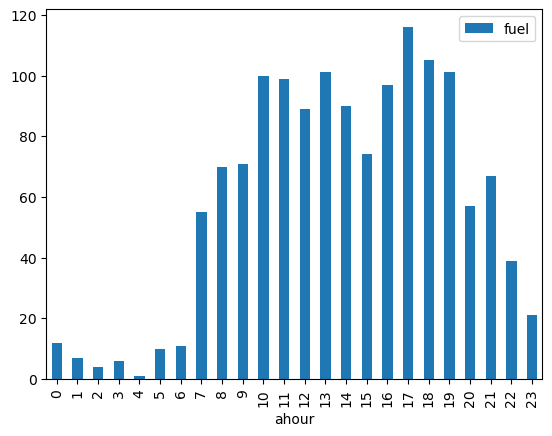

In [77]:
display(process_data(ev2))